### Task 1
1. Task one Completion Strategy:
Goal: The primary goal is to classify Yelp reviews into one of three categories: "Restaurants," "Nightlife," or "Shopping."。 We decide to use Naive Bayes beacuse it is  efficient with high-dimensional datasets, like those generated from text data, and it often provide a  baseline in text classification tasks due to its probabilistic nature. 
Process: We preprocess the data to clean and normalize the text, apply TF-IDF vectorization for feature extraction, balance the class distribution using SMOTE, and train a Multinomial Naive Bayes model. We then evaluate the model's performance using cross-validation and a held-out test set.

2. Data Representation and Preprocessing: 
+ Removing Contractions and Numerical References :
We simplify the text by removing contractions (e.g., 's|'ll|'d|'re|'ve|'m|n'") and numerical references.within brackets (e.g.[12345])to standardize the input.
+ Character Normalization: Words with exaggerated characters are normalized (e.g., "soooo" becomes "so") to ensure consistency in word forms.
+ Tokenization and Lemmatization: We break down the text into individual words and convert them to their base or lemma form, using POS tagging to accurately determine the grammatical usage of words in the text.(e.g., "going" becomes "go","bananas"becomes"banana".)
+ Removing Stopwords and Punctuation: Non-informative elements like stopwords (e.g., 'a', "is","it","do", "off")and punctuation marks (e.g. '!', '#', '$')are removed to focus on meaningful words that contribute to classification.

3. Feature Engineering:
TF-IDF Vectorization: This method is used to transform text into a numeric format, weighting words not only by their frequency in a single document but also by their rarity across all documents, which helps us highlight important words useful for classification.

4. Handling Class Imbalance:
To prevent model bias towards the majority class(restaurant) and ensure it learns equally from all classes, we use the SMOTE technique to balance the dataset by generating synthetic samples.

5. Model Training and Validation:
+ Model Choice: We use the Multinomial Naive Bayes model for the Task one, suitable for high-dimensional text data after transformed by produced by TF-IDF.
+ Rationale: Despite its simplicity and the assumption of feature independence, Naive Bayes is effective in managing high-dimensional spaces and performs well in text classification due to its probabilistic Bayes theorem.
+ Cross-validation: We use a 10-fold Stratified cross-validation within the training data to tune and validate the model before final testing, ensuring that our model generalizes well to new data.

6. Evaluation and Reporting:
Performance Reporting: After cross-validation shows satisfactory results (93% accuracy), we use the remaining 20% of the data as a test set, where the model achieves 88% accuracy, confirming its effectiveness.

7. Improved Methods:
Our first model performance fine by doing cleaning and probability-based modeling to tackle common issues in classifying text. The firstl steps clean up and make the text more uniform, and  TF-IDF highlights important words, and SMOTE ensures that all categories are equally represented, avoiding bias towards any single group,and naïve bayes works well for NLP task.
Challenges: Distinguishing between "Nightlife" and "Restaurants" is challenging due to similar mentions of food and drinks in both categories. And All three classes may all mention about price.
Proposed Solution: To improve classification, we consider adding more features and exploring different modeling techniques, so we then build our second model.


### Task two
1. Motivation for Improving the Model:
We aim to enhance our initial model by incorporating additional variables that are more informative for distinguishing between the categories, particularly between "Restaurant" and "Nightlife." Based on our analysis:

2. Feature selection:
+ Geographic Variables: Latitude and longitude were considered less useful since all reviews are from the same urban area (New Orleans) and their pearson correlation is 0.3, which is relatively high.
+ Mean Check-in Time: This variable showed potential for distinguishing "Nightlife" (especially very late activities might more tend to be” Nightlife”) from other categories. Also, it has a minimal correlation overall, making it a suitable candidate for inclusion in the model.
+ Name Variable: Including the name with the review text may provide clear indicators of the category since names often contain keywords like 'store,' 'shop,' 'restaurant,' or 'bar”, which might make to classification more clear.

3. Data Preprocessing Steps
+ Text Variables:
Combination: We combine the 'name' and 'review' into one column, treating it as a single text variable.
+ Preprocessing Techniques: We apply the same methods as in the initial task, which include removing contractions, tokenizing, lemmatizing, and removing stopwords and punctuation. The clean text is then transformed using TF-IDF Vectorization.
+  Numerical Variables:
Mean Check-in Time: We observed a non-normal distribution with two peaks during certain hours. Attempts to normalize it using PowerTransformer method,but still non-normality. To keep the model simple, we retain the original data format.
4. Handling Class Imbalance
We use SMOTE to oversample the data and mitigate bias towards the majority class (Restaurant).
5. Model Training and Validation
+ Variable-Specific Modeling:
**Text Features**: For word frequency feature derived from text (including the combined 'name' and 'review'), we select the **Multinomial Naive Bayes model** due to its suitability for handling word frequencies. This is our **text_model**. (train this model on 80% training data)
**Numerical Features**: For 'mean_checkin_time,' we choose the **Gaussian Naive Bayes model**, which is typically used for features with a distribution close to normal. Noticing the non-normal distribution of the time feature, we adjust the model using grid search cross-validation on the 80% training data to tuning hyperparameter "var_smoothing'. This is our **numerical_model**.
+ Combining Models:
We multiply the predictive probabilities from both models for each feature, enhancing the overall prediction accuracy. This is our joined_model.
Initially testing this combined model (joined_model) on the test set shows an accuracy of 88%. But We notice that the precision is improved for 'Nightlife' and 'Restaurant' compared the model in task one (from 60 % to 66% in "Nightlife" and from 96% to 98% in "Resaturant"), but a decrease for 'Shopping.'
+ Adjusted combining model:
To remain the enhanced model predict precision in “Nightlife”and “Restaurant” without losing accuracy in predicting 'Shopping,', we adjust model this way: if the text model predicts 'Shopping,' we retain this prediction. Otherwise, we use the combined model to predict between 'Restaurant' and 'Nightlife'.
This strategy improves the overall test accuracy from 88% to 90%.

Finally, we retrain the combined model using all the data in the training set, then use it to predict our test data, and then adjust the final predictions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2838 non-null   int64  
 1   name               2838 non-null   object 
 2   latitude           2838 non-null   float64
 3   longitude          2838 non-null   float64
 4   mean_checkin_time  2838 non-null   float64
 5   review             2838 non-null   object 
 6   category           2838 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 155.3+ KB


In [4]:
df["ID"].nunique()

2838

<Axes: xlabel='category', ylabel='count'>

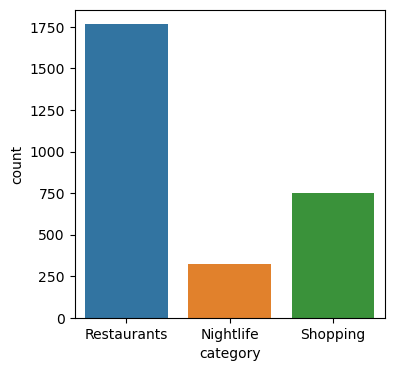

In [5]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x="category")

#### here we notice that the classification is not balance so  using SMOTE to oversample later

In [6]:
print(df["latitude"].max(),df["latitude"].min())

30.0515751 29.89320094


In [7]:
print(df["longitude"].max(),df["longitude"].min())

-89.9125101 -90.2230101


### data preprocessing

#### 1. Text processing:remove contraction-(’s\'d\,m..)+ remive repeated words (soooo\greatttt..) +lemmatize words(including noun,verb,adj,adv..)

In [8]:
import nltk
nltk.download("punkt")
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\keden\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\keden\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
lemmatizer=WordNetLemmatizer()
stopwords_set=set(stopwords.words("english"))
punctuation_set=set(string.punctuation)

In [162]:
# punctuation_set

In [10]:
def remove_contractions(text):
    text = re.sub(r"\b('s|'ll|'d|'re|'ve|'m|n't)\b", '', text)
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    return text

In [11]:
def reduce_repeated_characters(word):  #sooooooo
    return re.sub(r'(.)\1{2,}', r'\1\1', word)

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\keden\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [13]:
from nltk.corpus import wordnet
from nltk import pos_tag
def get_wordnet_pos(treebank_tag):  #seperate different cate: gping--go
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

In [14]:
def clean_and_lemma(text):  
   
    text=remove_contractions(text)
    
    words=nltk.word_tokenize(text)
    words = [word for word in words if word.lower() not in stopwords_set]
    pos_tags = pos_tag(words)  
    
    filtered_lemma_words = []
    for word, tag in pos_tags:
        wordnet_pos = get_wordnet_pos(tag)  # get cixing
        reduced_word = reduce_repeated_characters(word)
        lemma_word = lemmatizer.lemmatize(reduced_word.lower(), pos=wordnet_pos)
        if all(char not in punctuation_set for char in lemma_word) and lemma_word.strip():
            filtered_lemma_words.append(lemma_word)

    return " ".join(filtered_lemma_words)

In [15]:
# test
a= "In a word...'OVERRATED!''.  The food took forever to come out.  The burger was WAY overcooked (Especially when I ordered it Medium Rare) and the Seafood Jumbalaya was Decent.  Not worth the price.  There are better places to eat in the french quarter.  It was not horrible, but for everything that we had heard about this place, I would have expected much better."
clean_and_lemma(a)

'word food take forever come burger way overcook especially order medium rare seafood jumbalaya decent worth price good place eat french quarter horrible everything heard place would expect much well'

In [16]:
df["review_clean"]=df["review"].apply(clean_and_lemma)
df["name_clean"]=df["name"].apply(clean_and_lemma)

In [17]:
df["review_clean"].head(10)

0    experienced splendid pig trip nola family appr...
1    ok great location girl behind counter actually...
2    soo excite location disappoint fire lol sandwi...
3    open feel like hit big open space list communa...
4             love hole wall def must get biscuit huge
5    ever mood affordable tasty gentilly area make ...
6    disgust place ever walk got charge bad lady wo...
7    stand st roch corner shop downtown daily beet ...
8    fried chicken good service slow cleanliness at...
9    bread special bread basket fry soft shell crab...
Name: review_clean, dtype: object

In [18]:
df["name_clean"].head()

0                   splendid pig
1                         subway
2                  firehouse sub
3           port orleans brewing
4    new orleans cake caf bakery
Name: name_clean, dtype: object

In [19]:
X_review=df["review_clean"]
y=df["category"]

In [20]:
df["X_text"] = df["name_clean"]+ " "+df["review_clean"] 
X_text = df["X_text"]

In [21]:
X_text.head()

0    splendid pig experienced splendid pig trip nol...
1    subway ok great location girl behind counter a...
2    firehouse sub soo excite location disappoint f...
3    port orleans brewing open feel like hit big op...
4    new orleans cake caf bakery love hole wall def...
Name: X_text, dtype: object

### Base model: only use review

### 1.train test split on training dataset

In [22]:
from sklearn.model_selection import train_test_split
X_train_review, X_test_review, y_train, y_test\
= train_test_split(X_review,y, test_size=0.2, random_state=101)

#### 2.Model

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB

In [24]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

In [25]:
tfidf = TfidfVectorizer()
X_train_review_tfidf = tfidf.fit_transform(X_train_review)

In [26]:
smote = SMOTE(random_state=42)
X_train_review_smote, y_train_smote = smote.fit_resample(X_train_review_tfidf, y_train)

In [27]:
simple_text_model = MultinomialNB()

In [28]:
cv_method = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [29]:
scores_simple_text_model= cross_validate(
    estimator=simple_text_model,
    X=X_train_review_smote,
    y=y_train_smote,
    scoring=scoring,
    cv=cv_method,)

In [30]:
pd.DataFrame(scores_simple_text_model)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.019075,0.012985,0.920930,0.927692,0.920859,0.920972
1,0.028671,0.019003,0.911628,0.918180,0.911519,0.910264
2,0.025065,0.017000,0.937209,0.941763,0.937451,0.936526
3,0.031857,0.014008,0.939394,0.941326,0.939394,0.939035
4,0.026913,0.012084,0.948718,0.949885,0.948718,0.948329
5,0.030133,0.012726,0.927739,0.934324,0.927739,0.926790
6,0.027983,0.009999,0.941725,0.947267,0.941725,0.941890
7,0.026002,0.019008,0.941725,0.945472,0.941725,0.941137
8,0.023517,0.014999,0.960373,0.962859,0.960373,0.960301
9,0.031986,0.017078,0.948718,0.951583,0.948718,0.948303


In [31]:
pd.DataFrame(scores_simple_text_model).mean()

fit_time                0.027120
score_time              0.014889
test_accuracy           0.937816
test_precision_macro    0.942035
test_recall_macro       0.937822
test_f1_macro           0.937355
dtype: float64

#### 3. Evaluate base_model perforemance on 20% trainning data

In [32]:
simple_text_model.fit(X_train_review_smote,y_train_smote)

MultinomialNB()

In [33]:
X_test_review_tfidf=tfidf.transform(X_test_review)

In [34]:
from sklearn.metrics import classification_report

In [35]:
y_pred_simple_text_model = simple_text_model.predict(X_test_review_tfidf)
report_simple_text_model=classification_report(y_test,y_pred_simple_text_model)
print(report_simple_text_model)

              precision    recall  f1-score   support

   Nightlife       0.60      0.79      0.68        70
 Restaurants       0.96      0.86      0.91       334
    Shopping       0.89      0.95      0.92       164

    accuracy                           0.88       568
   macro avg       0.82      0.87      0.84       568
weighted avg       0.89      0.88      0.88       568



#### here my can see our simple_text_model(building Multinominal NB only based on "Review" attributes has 88% accuracy. Also, we notice that the "Nightlife"  has only 0.6 precision，which means this simple_text_model might not  be a good predictor on "NightLife" class

## Q2： Improved model: joined model (Multinominal NB joined  Gaussian NB)

#### 1. EDA to pick num attributes

In [36]:
num_columns = df[['latitude', 'longitude', 'mean_checkin_time']]

In [37]:
pearson_corr = num_columns.corr(method='pearson')

In [38]:
print(pearson_corr)

                   latitude  longitude  mean_checkin_time
latitude           1.000000   0.328053          -0.001915
longitude          0.328053   1.000000          -0.026829
mean_checkin_time -0.001915  -0.026829           1.000000


<Axes: >

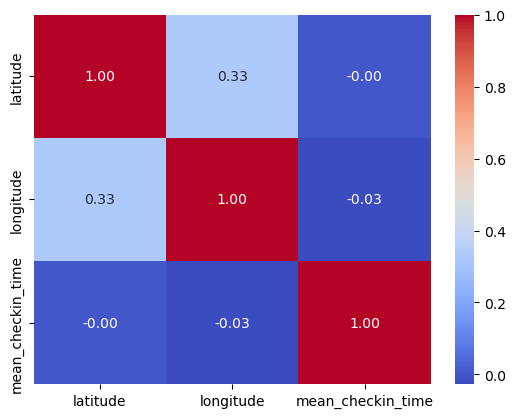

In [39]:
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")

C:\Users\keden\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

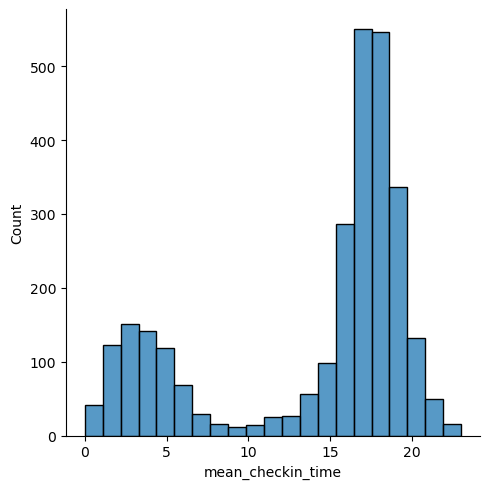

In [40]:
plt.figure(figsize=(3,3))
sns.displot(data=df, x="mean_checkin_time")

In [41]:
X_num=df[["mean_checkin_time"]]

#### 2.train test split on training dataset

In [42]:
from sklearn.model_selection import train_test_split
X_text_train, X_text_test, X_num_train,X_num_test,y_train, y_test\
= train_test_split(X_text,X_num,y, test_size=0.2, random_state=101)

In [43]:
X_text_train.shape

(2270,)

In [44]:
X_num_train.shape

(2270, 1)

In [45]:
# X_num_train

#### 3. Model (MultinomialNB for X_text and GaussianNB for X_num)

#### 3.1 text_model

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
from sklearn.base import clone

In [47]:
text_model = MultinomialNB()

In [48]:
tfidf = TfidfVectorizer()
X_text_train_tfidf = tfidf.fit_transform(X_text_train)

smote = SMOTE(random_state=42)
X_text_train_tfidf_smote, y_train_smote = smote.fit_resample(X_text_train_tfidf, y_train)

model = clone(text_model)
model.fit(X_text_train_tfidf_smote, y_train_smote)

MultinomialNB()

#### evaluate text_model(including review and name) on the 20% training dataset

In [49]:
X_text_test_tfidf = tfidf.transform(X_text_test)
y_pred = model.predict(X_text_test_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Nightlife       0.62      0.81      0.70        70
 Restaurants       0.96      0.88      0.92       334
    Shopping       0.92      0.95      0.93       164

    accuracy                           0.89       568
   macro avg       0.83      0.88      0.85       568
weighted avg       0.90      0.89      0.89       568



#### we notice that the "Nightlife" has only 0.62 precision，which means this text_model might not  be a good predictor on "NightLife" class, so we want to add numerical attribute" mean_check_time" to help improve precision on "NightLife".

### 3.2  numercial model:  we wannt to add this feature "mean_checkin_time" to fit another Gaussian NB model and combined this numeric model to our text_model to help us better classify "restaurant" and "nightlife".

In [50]:
numerical_model=GaussianNB()

In [51]:
smote = SMOTE(random_state=42)
X_num_train_smote, y_train_smote = smote.fit_resample(X_num_train, y_train)

In [52]:
cv_method = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

In [53]:
scores_numerical_model= cross_validate(
    estimator=numerical_model,
    X=X_num_train_smote,
    y=y_train_smote,
    scoring=scoring,
    cv=cv_method,)

In [54]:
pd.DataFrame(scores_numerical_model)

,fit_time,score_time,test_accuracy,test_precision_macro,test_recall_macro,test_f1_macro
0,0.011085,0.011990,0.567442,0.504525,0.566628,0.476024
1,0.007926,0.011076,0.572093,0.496115,0.571743,0.474262
2,0.008923,0.014008,0.565116,0.533437,0.566385,0.466163
3,0.011071,0.016010,0.545455,0.566180,0.545455,0.456853
4,0.010575,0.014001,0.561772,0.604503,0.561772,0.470536
5,0.011006,0.011957,0.540793,0.543902,0.540793,0.460878
6,0.009922,0.014076,0.545455,0.514908,0.545455,0.452441
7,0.009924,0.012003,0.557110,0.435364,0.557110,0.457106
8,0.010670,0.016009,0.531469,0.442661,0.531469,0.435425
9,0.009092,0.011908,0.575758,0.608535,0.575758,0.482428


### hyperparameter tuning on "var_smoothing" in GaussianNB

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [57]:
cv_method = StratifiedKFold(n_splits=10, random_state=101, shuffle=True)

In [58]:
gs_NB = GridSearchCV(estimator=numerical_model, param_grid=params_NB, cv=cv_method, verbose=1, scoring='accuracy')

In [59]:
gs_NB.fit(X_num_train_smote, y_train_smote)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=101, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [60]:
print("Best parameters:", gs_NB.best_params_)
print("Best score:", gs_NB.best_score_)

Best parameters: {'var_smoothing': 0.1873817422860384}
Best score: 0.5564791022930559


In [61]:
numerical_model= GaussianNB(var_smoothing=0.1873817422860384)

### 3.3 joined model (combined text_model : MultinomialNB and numerical_model: GaussianNB) by multiply

In [62]:
text_model.fit(X_text_train_tfidf_smote, y_train_smote)

MultinomialNB()

In [63]:
numerical_model.fit(X_num_train_smote,y_train_smote)

GaussianNB(var_smoothing=0.1873817422860384)

In [64]:
text_prob=text_model.predict_proba(X_text_test_tfidf)

In [65]:
text_prob

array([[0.14344528, 0.75626572, 0.100289  ],
       [0.0577327 , 0.77497394, 0.16729337],
       [0.03345531, 0.9611652 , 0.00537949],
       ...,
       [0.05320913, 0.93132135, 0.01546953],
       [0.12297559, 0.77717495, 0.09984946],
       [0.25209082, 0.10911262, 0.63879656]])

In [66]:
numerical_prob=numerical_model.predict_proba(X_num_test)

In [67]:
numerical_prob[:10]

array([[0.15491956, 0.31565873, 0.52942171],
       [0.11661118, 0.29842488, 0.58496394],
       [0.13367008, 0.30529832, 0.5610316 ],
       [0.13367008, 0.30529832, 0.5610316 ],
       [0.10944583, 0.29643608, 0.59411809],
       [0.15491956, 0.31565873, 0.52942171],
       [0.13367008, 0.30529832, 0.5610316 ],
       [0.65079385, 0.32661479, 0.02259135],
       [0.72450667, 0.26959104, 0.00590229],
       [0.2124218 , 0.34405765, 0.44352055]])

In [68]:
joined_proba=text_prob*numerical_prob

In [69]:
joined_proba[:10]

array([[0.02222248, 0.23872188, 0.05309517],
       [0.00673228, 0.2312715 , 0.09786059],
       [0.00447197, 0.29344212, 0.00301806],
       [0.02718584, 0.23430514, 0.01635793],
       [0.00260689, 0.01382448, 0.55225974],
       [0.0613852 , 0.08000629, 0.18545782],
       [0.02135056, 0.21883018, 0.06928702],
       [0.5537488 , 0.02319268, 0.00176458],
       [0.32224579, 0.0887314 , 0.00133443],
       [0.02476169, 0.29243675, 0.01484334]])

In [70]:
y_pred_index_joined= np.argmax(joined_proba, axis=1)

In [71]:
class_labels=["Nightlife","Restaurants","Shopping"]
y_pred_label_joined=[class_labels[i] for i in y_pred_index_joined]

In [108]:
# y_pred_label_joined

In [72]:
from sklearn.metrics import classification_report
report_joined_model=classification_report(y_test,y_pred_label_joined)
print(report_joined_model)

              precision    recall  f1-score   support

   Nightlife       0.66      0.84      0.74        70
 Restaurants       0.98      0.85      0.91       334
    Shopping       0.84      0.97      0.90       164

    accuracy                           0.88       568
   macro avg       0.83      0.89      0.85       568
weighted avg       0.90      0.88      0.89       568



In [100]:
joined_proba

array([[0.02222248, 0.23872188, 0.05309517],
       [0.00673228, 0.2312715 , 0.09786059],
       [0.00447197, 0.29344212, 0.00301806],
       ...,
       [0.00824313, 0.29397972, 0.0081899 ],
       [0.02225878, 0.25559955, 0.04893777],
       [0.04941548, 0.03669427, 0.29875255]])

In [101]:
text_prob.

array([[0.14344528, 0.75626572, 0.100289  ],
       [0.0577327 , 0.77497394, 0.16729337],
       [0.03345531, 0.9611652 , 0.00537949],
       ...,
       [0.05320913, 0.93132135, 0.01546953],
       [0.12297559, 0.77717495, 0.09984946],
       [0.25209082, 0.10911262, 0.63879656]])

In [103]:
text_model.classes_

array(['Nightlife', 'Restaurants', 'Shopping'], dtype='<U11')

### 3.4 adjust joined model

In [104]:
def final_predict(text_prob, joined_proba):
    final_predictions = []
    for i in range(text_prob.shape[0]):
        # chech if the shopping class get highest score in text_model, if yes, we choose this highest proba and predict it as "Shopping"
        if text_prob[i][2] > max(text_prob[i][0], text_prob[i][1]):
            final_predictions.append("Shopping")
        else:
            # if shopping class not get highest score in text_model, then we look at our joined proba and choose the highest prob
            if joined_proba[i][0] > joined_proba[i][1]:
                final_predictions.append("Nightlife")
            else:
                final_predictions.append("Restaurants")

    return final_predictions

In [106]:
y_pred_final=final_predict(text_prob, joined_proba)

#### Evaluate this adjusted joined model using 20% training dataset, and we notice that compared to joined model, we get higher precision on each classes, and not compromise the precision of shopping class of the text_model. Finally, we  get a accuracy of 90%, we think it is ok, so we decide to use this adjusted joined model to predict our test dataset。

In [107]:
report_final_model=classification_report(y_test,y_pred_final)
print(report_final_model)

              precision    recall  f1-score   support

   Nightlife       0.69      0.84      0.76        70
 Restaurants       0.96      0.90      0.92       334
    Shopping       0.92      0.95      0.93       164

    accuracy                           0.90       568
   macro avg       0.85      0.89      0.87       568
weighted avg       0.91      0.90      0.91       568



#### first we need to use the adjusted joined model to retrain all the training dataset.

### 4.retrain the model using all training dataset

In [134]:
X_text_tfidf = tfidf.fit_transform(X_text)

In [135]:
smote = SMOTE(random_state=42)
X_text_tfidf_smote, y_smote = smote.fit_resample(X_text_tfidf, y)

text_model_final=MultinomialNB()
text_model_final.fit(X_text_tfidf_smote,y_smote)

MultinomialNB()

In [136]:
smote = SMOTE(random_state=42)
X_num_smote, y_smote = smote.fit_resample(X_num, y)
numerical_model_final= GaussianNB(var_smoothing=0.1873817422860384)
numerical_model_final.fit(X_num_smote,y_smote)

GaussianNB(var_smoothing=0.1873817422860384)

### 5. Predict the class of our test dataset

In [142]:
df_test=pd.read_csv("test.csv")

In [143]:
df_test["name_clean"]=df_test["name"].apply(clean_and_lemma)
df_test["review_clean"]=df_test["review"].apply(clean_and_lemma)

In [144]:
df_test["X_text"] = df_test["name_clean"]+ " "+df_test["review_clean"]

In [145]:
df_test["X_text"].head(5)

0    mcalister deli twice last week deli locate har...
1    soup garden soup good however good would under...
2    station coffee shop bakery friendly personable...
3    key west hat company love hat probably 20 stil...
4    lengua madre exactly want din experience great...
Name: X_text, dtype: object

In [146]:
X_text_final_test=df_test["X_text"]
X_num_final_test=df_test[["mean_checkin_time"]]

In [147]:
X_text_tfidf_final_test=tfidf.transform(X_text_final_test)
text_prob_final=text_model_final.predict_proba(X_text_tfidf_final_test)

In [148]:
text_prob_final

array([[0.13036615, 0.79913671, 0.07049714],
       [0.03629059, 0.8936738 , 0.07003561],
       [0.36767884, 0.48038364, 0.15193752],
       ...,
       [0.50715545, 0.45760318, 0.03524136],
       [0.15095304, 0.67759574, 0.17145122],
       [0.06979635, 0.83982262, 0.09038103]])

In [150]:
num_prob_final=numerical_model_final.predict_proba(X_num_final_test)

In [151]:
num_prob_final

array([[0.16968369, 0.33193345, 0.49838286],
       [0.09025566, 0.29520238, 0.61454195],
       [0.14257604, 0.31716947, 0.54025449],
       ...,
       [0.59102914, 0.36287484, 0.04609602],
       [0.24231896, 0.36650509, 0.39117595],
       [0.12084279, 0.30569096, 0.57346625]])

In [155]:
joined_prob_final=text_prob_final*num_prob_final

In [156]:
joined_prob_final

array([[0.02212101, 0.26526021, 0.03513456],
       [0.00327543, 0.26381464, 0.04303982],
       [0.0524222 , 0.15236302, 0.08208493],
       ...,
       [0.29974365, 0.16605268, 0.00162449],
       [0.03657878, 0.24834229, 0.06706759],
       [0.00843439, 0.25672619, 0.05183047]])

In [157]:
y_pred_final_test=final_predict(text_prob_final, joined_prob_final)

In [158]:
df_test["category"]=y_pred_final_test

In [159]:
df_test[["ID","category"]].to_csv("final_test_prediction.csv",index=False)